# EDA do modelo salvo com legenda e descri√ß√£o gerada com LLM

## Carregando modelo j√° pr√©-computado

In [ ]:
# Imports
from pathlib import Path
import pandas as pd, random, numpy as np
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS as STOP_PT


# Semente para compoenentes pseudo-aleat√≥rios
SEED = 42
random.seed(SEED); np.random.seed(SEED)

# Diretorios
ROOT = Path('../')
DATA_DIR   = ROOT / 'data'
MODEL_DIR  = ROOT / 'models'/ 'expr_bertopic_profiap'
MODEL_DIR.mkdir(parents=True, exist_ok=True)

# Carregar dados e pr√©-processamento
CSV_PATH = DATA_DIR / 'raw' / 'dissertacoes_profiap_14_23.csv'  # ajuste se precisar
df = pd.read_csv(CSV_PATH).drop_duplicates("DS_RESUMO")
docs = df["DS_RESUMO"].fillna("").tolist()
nlp  = spacy.load('pt_core_news_sm', disable=['ner', 'parser'])
def preprocess(doc):
    return ' '.join([t.lemma_.lower() for t in nlp(doc) if t.is_alpha and not t.is_stop])
docs_pp = [preprocess(d) for d in docs]

emb_model = SentenceTransformer("ibm-granite/granite-embedding-278m-multilingual", trust_remote_code=True)
embeddings = emb_model.encode(docs_pp, show_progress_bar=True)

topic_model = BERTopic.load(MODEL_DIR / 'model_final_gpt_labels', embedding_model=emb_model)

/home/th/.cache/pypoetry/virtualenvs/bertopic-profiap-TFdnyCro-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:22<00:00,  1.77it/s]


# Datamapplot com legendas de LLM

<InteractiveFigure width=1200 height=750>
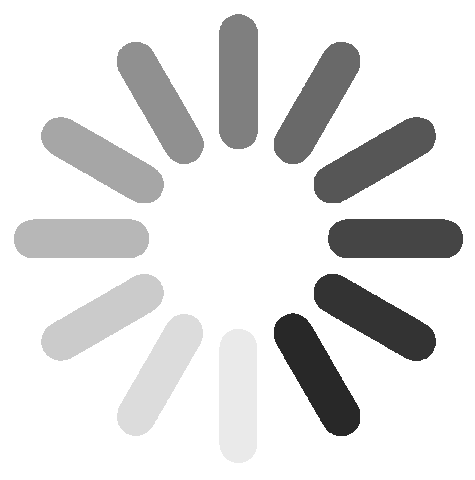

In [2]:
topic_model.set_topic_labels([item[0] for item in topic_model.get_topic_info().gpt_label])

# Visualiza√ß√µes
datamap = topic_model.visualize_document_datamap(
    docs=docs_pp,
    embeddings=embeddings,
    interactive=True,
    enable_search=True,
    custom_labels=True,
    title="Mapa das Disserta√ß√µes PROFIAP (2015-2023)",
)
datamap

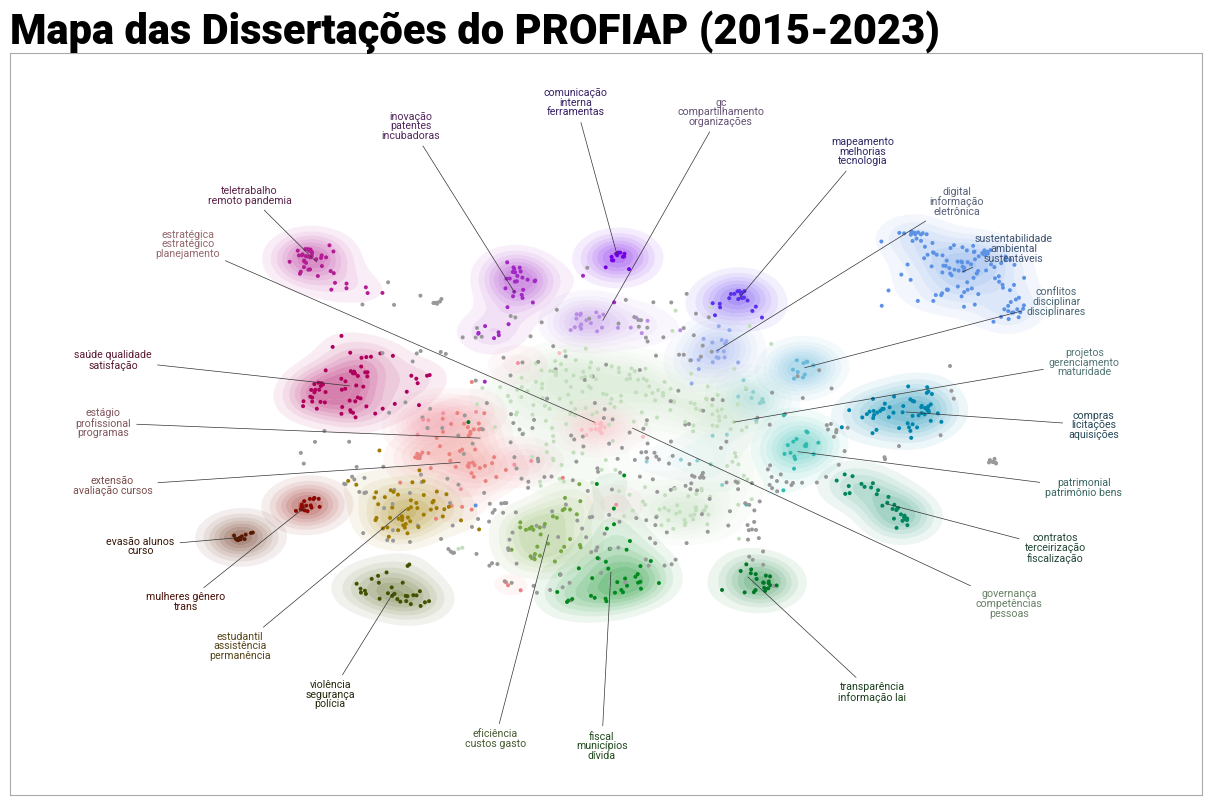

In [4]:
datamap = topic_model.visualize_document_datamap(
    docs=docs_pp,
    embeddings=embeddings,
    interactive=False,
    enable_search=False,
    custom_labels=False,
    title="Mapa das Disserta√ß√µes do PROFIAP (2015-2023)",
)


In [ ]:
# Tabela de Representa√ß√µes utilizando LLM
tab_rep_llm = topic_model.get_topic_info()[['Topic', 'Count', 'Representation', 'gpt_label']][1:].set_index('Topic')
tab_rep_llm.columns = ['quantidade','palavras-chave','gpt_label']
tab_rep_llm

In [10]:
topic_info = topic_model.get_topic_info()
latex_output = []


for _, row in topic_info.iterrows():
    topic_num = row['Topic']
    name = row['CustomName'] if pd.notna(row['CustomName']) else row['gpt_label']
    keywords = ", ".join(row['Representation'])
    description = row['gpt_descri√ß√£o']
    count = row['Count']
    
    latex_output.append(f"\\subsection*{{T√≥pico {topic_num} - {name}}}")
    latex_output.append(f"\\textbf{{N√∫mero de documentos:}} {count}\\\\")
    latex_output.append(f"\\textbf{{Palavras-chave:}} {keywords}.")
    latex_output.append("")
    latex_output.append(description)
    latex_output.append("")

# Unir tudo em um √∫nico texto LaTeX
latex_text = "\n".join([str(item) for item in latex_output])

print(latex_text)

\subsection*{T√≥pico -1 - Gest√£o P√∫blica e Avalia√ß√£o Desempenho}
\textbf{N√∫mero de documentos:} 322\\
\textbf{Palavras-chave:} servi√ßos, desempenho, planejamento, efici√™ncia, contas, informa√ß√£o, avalia√ß√£o, qualidade, lei, pessoas.

['O presente t√≥pico aborda a gest√£o e avalia√ß√£o de servi√ßos p√∫blicos, enfatizando a efici√™ncia, qualidade e planejamento no √¢mbito das institui√ß√µes e organiza√ß√µes, com foco em √°reas como sa√∫de e educa√ß√£o. Atrav√©s da an√°lise de desempenho e implementa√ß√£o de ferramentas de controle, busca-se garantir a accountability e acessibilidade das informa√ß√µes, al√©m de promover melhorias nas pr√°ticas administrativas e na rela√ß√£o entre √≥rg√£os governamentais e cidad√£os. A pesquisa explora a efic√°cia da legisla√ß√£o vigente e os impactos das pol√≠ticas p√∫blicas, bem como os desafios enfrentados por munic√≠pios e entidades na execu√ß√£o or√ßament√°ria e presta√ß√£o de servi√ßos.']

\subsection*{T√≥pico 0 - Governan√ßa e Gest√£o de Co

In [15]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0     -1    322             -1_controle_servi√ßos_social_desempenho   
1      0    739         0_desenvolvimento_modelo_avalia√ß√£o_compras   
2      1     41       1_transpar√™ncia_informa√ß√£o_acesso_eletr√¥nico   
3      2     41       2_teletrabalho_remoto_pandemia_produtividade   
4      3     29           3_viol√™ncia_seguran√ßa_pol√≠cia_homic√≠dios   
5      4     29   4_conflitos_mapeamento_disciplinar_disciplinares   
6      5     17              5_mulheres_g√™nero_trans_representa√ß√£o   
7      6     14    6_estrat√©gica_estrat√©gico_planejamento_balanced   
8      7     14                       7_evas√£o_alunos_curso_cursos   
9      8     12  8_comunica√ß√£o_organizacional_ferramentas_organ...   

                                      Representation  \
0  [controle, servi√ßos, social, desempenho, pol√≠t...   
1  [desenvolvimento, modelo, avalia√ß√£o, compras, ...   
2  [transpar√™ncia, informa√ß√£o, acesso, eletr√¥nico...   
3  [teletrabalho, remoto, pandemia, produtividade...   
4  [viol√™ncia, seguran√ßa, pol√≠cia, homic√≠dios, po...   
5  [conflitos, mapeamento, disciplinar, disciplin...   
6  [mulheres, g√™nero, trans, representa√ß√£o, heter...   
7  [estrat√©gica, estrat√©gico, planejamento, balan...   
8  [evas√£o, alunos, curso, cursos, evadidos, grad...   
9  [comunica√ß√£o, organizacional, ferramentas, org...   

                                         gpt_label  \
0          [Gest√£o P√∫blica e Avalia√ß√£o Desempenho]   
1            [Governan√ßa e Gest√£o de Compet√™ncias]   
2  [compras p√∫blicas e sustentabilidade ambiental]   
3            [Comprometimento e Qualidade de Vida]   
4             [Avalia√ß√£o e Extens√£o Universit√°ria]   
5                 [Efici√™ncia em Compras P√∫blicas]   
6            [Avalia√ß√£o da Assist√™ncia Estudantil]   
7          [Teletrabalho na Administra√ß√£o P√∫blica]   
8            [Finan√ßas Municipais e Endividamento]   
9                  [Inova√ß√£o e Pol√≠ticas P√∫blicas]   

                                       gpt_descri√ß√£o  \
0  [O presente t√≥pico aborda a gest√£o e avalia√ß√£o...   
1  [O t√≥pico aborda a governan√ßa e gest√£o de comp...   
2  [O t√≥pico aborda a sustentabilidade em institu...   
3  [O t√≥pico aborda a pesquisa sobre comprometime...   
4  [O t√≥pico abrange a avalia√ß√£o e a extens√£o uni...   
5  [O t√≥pico abrange a an√°lise das compras, licit...   
6  [O t√≥pico abrange a an√°lise das pol√≠ticas p√∫bl...   
7  [O t√≥pico aborda o fen√¥meno do teletrabalho, u...   
8  [O t√≥pico aborda a gest√£o fiscal e financeira ...   
9  [O t√≥pico aborda a import√¢ncia da inova√ß√£o e d...   

                                                 MMR  \
0  [servi√ßos, desempenho, planejamento, servi√ßo, ...   
1  [governan√ßa, compet√™ncias, qualidade, organiza...   
2  [sustentabilidade, ambiental, sustent√°veis, su...   
3  [sa√∫de, qualidade, qvt, fatores, trabalhadores...   
4  [extens√£o, avalia√ß√£o, programa, universit√°ria,...   
5  [licita√ß√µes, aquisi√ß√µes, contrata√ß√µes, licita√ß...   
6  [estudantil, assist√™ncia, programa, pnaes, ben...   
7  [teletrabalho, pandemia, desvantagens, h√≠brido...   
8  [fiscal, munic√≠pios, contribuintes, despesas, ...   
9  [inova√ß√£o, patentes, incubadoras, tecnol√≥gica,...   

                                 Representative_Docs  
0  [accountability controle social ganhado destaq...  
1  [tema qualidade vida trabalho qvt presente dis...  
2  [direito acesso informa√ß√£o p√∫blica diretamente...  
3  [teletrabalho largamente adotado empresas priv...  
4  [viol√™ncia g√™nero longo tornando problema orde...  
5  [business process management bpm disciplinas g...  
6  [estudo investiga ocorr√™ncia fen√¥meno teto vid...  
7  [planejamento estrat√©gico sendo adotado instit...  
8  [dados censo educa√ß√£o superior indicadores des...  
9  [universidades organiza√ß√µes formais destacam a...

In [17]:
hierarchical_topics = topic_model.hierarchical_topics(docs_pp)
hierarchical_visualization = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

hierarchical_tree = topic_model.get_topic_tree(hierarchical_topics)
hierarchical_tree

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:00<00:00, 500.42it/s]


'.\n‚îú‚îÄdesenvolvimento_modelo_avalia√ß√£o_qualidade_superior\n‚îÇ    ‚îú‚îÄ‚ñ†‚îÄ‚îÄcomunica√ß√£o_organizacional_ferramentas_organiza√ß√µes_constru√ß√£o ‚îÄ‚îÄ Topic: 8\n‚îÇ    ‚îî‚îÄdesenvolvimento_modelo_avalia√ß√£o_qualidade_superior\n‚îÇ         ‚îú‚îÄdesenvolvimento_modelo_avalia√ß√£o_qualidade_desempenho\n‚îÇ         ‚îÇ    ‚îú‚îÄ‚ñ†‚îÄ‚îÄteletrabalho_remoto_pandemia_produtividade_modalidade ‚îÄ‚îÄ Topic: 2\n‚îÇ         ‚îÇ    ‚îî‚îÄdesenvolvimento_modelo_avalia√ß√£o_compras_qualidade\n‚îÇ         ‚îÇ         ‚îú‚îÄdesenvolvimento_modelo_avalia√ß√£o_compras_qualidade\n‚îÇ         ‚îÇ         ‚îÇ    ‚îú‚îÄ‚ñ†‚îÄ‚îÄconflitos_mapeamento_disciplinar_disciplinares_melhoria ‚îÄ‚îÄ Topic: 4\n‚îÇ         ‚îÇ         ‚îÇ    ‚îî‚îÄ‚ñ†‚îÄ‚îÄdesenvolvimento_modelo_avalia√ß√£o_compras_qualidade ‚îÄ‚îÄ Topic: 0\n‚îÇ         ‚îÇ         ‚îî‚îÄ‚ñ†‚îÄ‚îÄtranspar√™ncia_informa√ß√£o_acesso_eletr√¥nico_lai ‚îÄ‚îÄ Topic: 1\n‚îÇ         ‚îî‚îÄ‚ñ†‚îÄ‚îÄestrat√©gica_estrat√©gico_planejamento_balanced

In [18]:
barchart = topic_model.visualize_barchart(top_n_topics=4, n_words=10,autoscale=True)

topics_over_time = topic_model.topics_over_time(docs_pp, timestamps=df['AN_BASE'],)
topics_over_time_visualization = topic_model.visualize_topics_over_time(topics_over_time)

hierarchical_topics = topic_model.hierarchical_topics(docs_pp)
hierarchical_visualization = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

hierarchical_tree = topic_model.get_topic_tree(hierarchical_topics)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 259.80it/s]


In [ ]:
topic_model.visualize_barchart(topics=range(0,4), n_words=10,autoscale=True, width=350, height=300)


In [ ]:
topic_model.visualize_barchart(topics=range(4,8), n_words=10,autoscale=True, width=350, height=300)


In [38]:
topic_model.visualize_barchart(topics=range(8,12), n_words=10,autoscale=True, width=350, height=300)


In [39]:
topic_model.visualize_barchart(topics=range(12,16), n_words=10,autoscale=True, width=350, height=300)


In [40]:
topic_model.visualize_barchart(topics=range(16,20), n_words=10,autoscale=True, width=350, height=300)


In [ ]:
topic_model.visualize_barchart(topics=range(20,24), n_words=10,autoscale=True, width=350, height=300)topic_model.visualize_barchart(topics=range(0,4), n_words=10,autoscale=True, width=350, height=300)



In [42]:
hierarchical_visualization

In [ ]:
# Dropdown para sele√ß√£o de um √∫nico t√≥pico
topic_names = [trace.name for trace in fig.data]

dropdown_buttons = [
    dict(
        label=topic,
        method="update",
        args=[
            {"visible": [t == topic for t in topic_names]},
            {"title": f'Evolu√ß√£o do T√≥pico {topic} ao Longo do Tempo'}
        ]
    )
    for topic in topic_names
]

fig.update_layout(
    yaxis_title="N√∫mero de Disserta√ß√µes",
    updatemenus=[
        {
            "buttons": dropdown_buttons,
            "direction": "down",
            "showactive": True,
            "x": 0,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    legend_title_text="Legenda dos T√≥picos",
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.3,
        xanchor="center",
        x=0.5,
        font=dict(size=10)
    ),
    margin=dict(b=150)
)

for i, trace in enumerate(fig.data):
    trace.visible = i == 0

fig.update_layout(title=f"Evolu√ß√£o do {topic_names[0]} ao Longo do Tempo")
fig.show()
